# MEAN DIFFERENCE with Precipitation dataset

Finding mean difference between four models for DJF seaoson. 

In [59]:
import math 

import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading datasets

In [2]:
# precip_wrf_ds
ds_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.pr.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.pr.2091-2100.nc')

# precip_loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.pr.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.pr.2091-2100.nc')

# precip_loca_14
ds_loca_14_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.pr.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.pr.2091-2100.nc')

# precip_bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.pr.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.pr.2091-2100.nc')

In [3]:
# Export to pandas and check for not null values
#test_df = ds_wrf_1980.to_dataframe()
#test_df[test_df['pr'].notnull()]
#ds_wrf_1980.notnull()

#### Slicing from 1991 to end of 2000

In [62]:
pr_wrf_from_1991 = ds_wrf_1980['pr'].sel(time=slice('1991-01-01', '2000-12-31'))
pr_loca_wrf_from_1991 = ds_loca_wrf_1980['pr'].sel(time=slice('1991-01-01','2000-12-31'))
pr_loca_14_from_1991 = ds_loca_14_1980['pr'].sel(time=slice('1991-01-01','2000-12-31'))
pr_bcsd_L14_from_1991 = ds_bcsd_L14_1980['pr'].sel(time=slice('1991-01-01', '2000-12-31'))

cbar_range = set()
season_str = 'DJF'
def add_to_cbar(ds):
    get_df = ds.to_dataframe()
    cbar_range.add(get_df[var_str].min())
    cbar_range.add(get_df[var_str].max())

#### Mean difference of narr_wrf


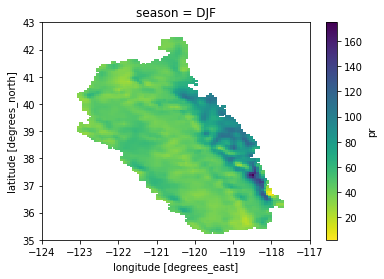

In [63]:
pr_wrf_1991 = pr_wrf_from_1991.groupby('time.season').mean('time')
#pr_wrf_2091 = ds_wrf_2091['pr'].where(pd.notnull(ds_wrf_2091['pr'])).groupby('time.season').mean('time')
pr_wrf_2091 = ds_wrf_2091['pr'].groupby('time.season').mean('time')
mean_diff_wrf_1991_2091 = ((pr_wrf_2091.sel(season=season_str) - pr_wrf_1991.sel(season=season_str)) / pr_wrf_1991.sel(season=season_str)) * 100 
mean_diff_wrf_1991_2091.plot(cmap='viridis_r')


In [64]:
add_to_cbar(mean_diff_wrf_1991_2091)

NameError: name 'var_str' is not defined

In [65]:
cbar_range

set()

#### Mean difference of narr_loca_wrf

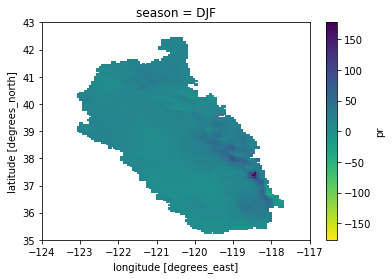

In [66]:
pr_loca_wrf_1991 = pr_loca_wrf_from_1991.groupby('time.season').mean('time')
pr_loca_wrf_2091 = ds_loca_wrf_2091['pr'].groupby('time.season').mean('time')
mean_diff_loca_wrf_1991_2091 = ((pr_loca_wrf_2091.sel(season=season_str) - pr_loca_wrf_1991.sel(season=season_str) )/  pr_loca_wrf_1991.sel(season=season_str)) * 100
mean_diff_loca_wrf_1991_2091.plot(cmap='viridis_r')



#### Mean difference of narr_loca_14

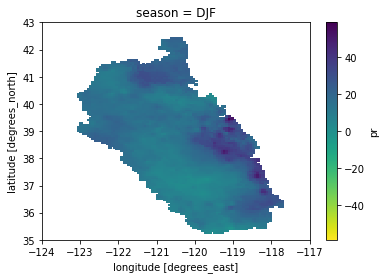

In [67]:
pr_loca_14_1991 = pr_loca_14_from_1991.groupby('time.season').mean('time')
pr_loca_14_2091 = ds_loca_14_2091['pr'].groupby('time.season').mean('time')
mean_diff_loca_14_1991_2091 = ((pr_loca_14_2091.sel(season=season_str) - pr_loca_14_1991.sel(season=season_str)) / pr_loca_14_1991.sel(season=season_str) ) * 100
mean_diff_loca_14_1991_2091.plot(cmap='viridis_r')

#### Mean difference of narr_bcsd_L14

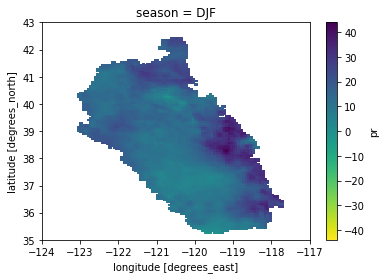

In [68]:
pr_bcsd_L14_1991 = pr_bcsd_L14_from_1991.groupby('time.season').mean('time')
pr_bcsd_L14_2091 = ds_bcsd_L14_2091['pr'].groupby('time.season').mean('time')
mean_diff_bcsd_L14_1991_2091 = ((pr_loca_14_2091.sel(season=season_str) - pr_bcsd_L14_1991.sel(season=season_str)) / pr_bcsd_L14_1991 .sel(season=season_str)) *100
mean_diff_bcsd_L14_1991_2091.plot(cmap='viridis_r')

In [77]:
# Helper function to setup clim for colorbar
# Get max and min and setup ceiling:
#   - by next fifth multiple if number 
#              has more than two digits
#   - else by 1
def setup_clim(ls):
    
    if(max(ls) < 0):
        return (math.floor(min(ls)), math.ceil(max(ls)))
    if(min(ls) < 0):
        if(abs(min(ls)) < max(ls)):
            if (len(str(abs(max(ls))).split('.')[0]) < 2):
                return (math.ceil(-max(ls)), math.ceil(max(ls)))
            else:
                return (math.floor(-max(ls)/5)*5, math.ceil(max(ls)/5)*5)
        else:
            if (len(str(abs(min(ls))).split('.')[0]) < 2):
                return (math.floor(min(ls)), math.ceil(-min(ls)))
            else:
                return (math.floor(min(ls)/5)*5, math.ceil(-min(ls)/5)*5)
    else:
        if (len(str(abs(max(ls))).split('.')[0]) < 2):
            return (math.floor(min(ls)), math.ceil(max(ls)))
        else:
            return (math.floor(min(ls)/5)*5, math.ceil(max(ls)/5)*5)
    

In [78]:
def add_to_cbar(ds, var_str, cbar_set):
    get_df = ds.to_dataframe()
    cbar_set.add(get_df[var_str].min())
    cbar_set.add(get_df[var_str].max())

## Multi-plots

{2.2081294, 43.895203, 174.68903, 177.26448, 58.573647, -37.646984, -3.5997663, -1.7124938}
(-180, 180)


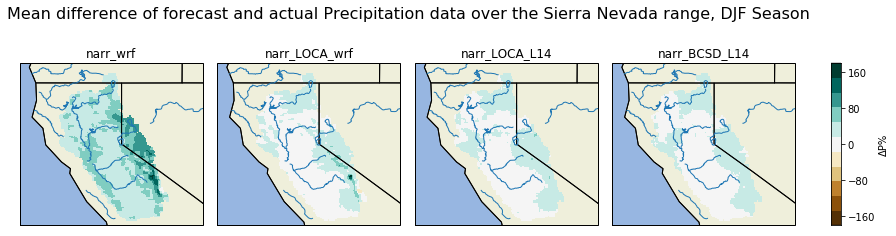

In [79]:

mean_list = [mean_diff_wrf_1991_2091, mean_diff_loca_wrf_1991_2091, mean_diff_loca_14_1991_2091, mean_diff_bcsd_L14_1991_2091]

# Configuration for the map
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 
                111, 
                axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad=0.2,
                share_all=True,
                label_mode="",
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5
               )
cbar_label_title = 'ΔP%'

cbar_range_mean_diff = set()
for ls in mean_list: 
    add_to_cbar(ls, 'pr', cbar_range_mean_diff)
print(cbar_range_mean_diff)
test = setup_clim(cbar_range_mean_diff)
print(test)

for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)    
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    # setting the location t
    ax.set_extent([-125, -116, 43, 35])

    djf_plt = mean_list[i].plot.pcolormesh(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap=plt.get_cmap('BrBG', 11), add_colorbar=False)
    #djf_plt.set_clim(min(cbar_range), max(cbar_range))
    djf_plt.set_clim(setup_clim(cbar_range_mean_diff))

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

fig.subplots_adjust(left=0.14, top=1.64)
fig.suptitle('Mean difference of forecast and actual Precipitation data over the Sierra Nevada range, {0} Season'.format(season_str), fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(djf_plt)
cb.set_label_text(cbar_label_title)
fig.savefig('Precipitation Mean Difference during {0} over Sierra Nevada range.png'.format(season_str), dpi=150, bbox_inches="tight")


_____________________________

## SEASONAL VARIATION OF PRECIPITATION OVER SIERRA NEVADA RANGE

{0.0064166486, -0.1402507, 2.4586258, -0.026476622, 2.6778078, 2.4685202, 10.123272, -1.3305321}
{0.24788938, 0.14070301, 0.5139697, 0.5579874, 16.72489, 17.863556, 21.916994, 29.60825}
{0.10931727, 0.0540446, 0.35500827, 0.37016, 15.480742, 15.975326, 19.484978, 19.55097}
(0, 30)


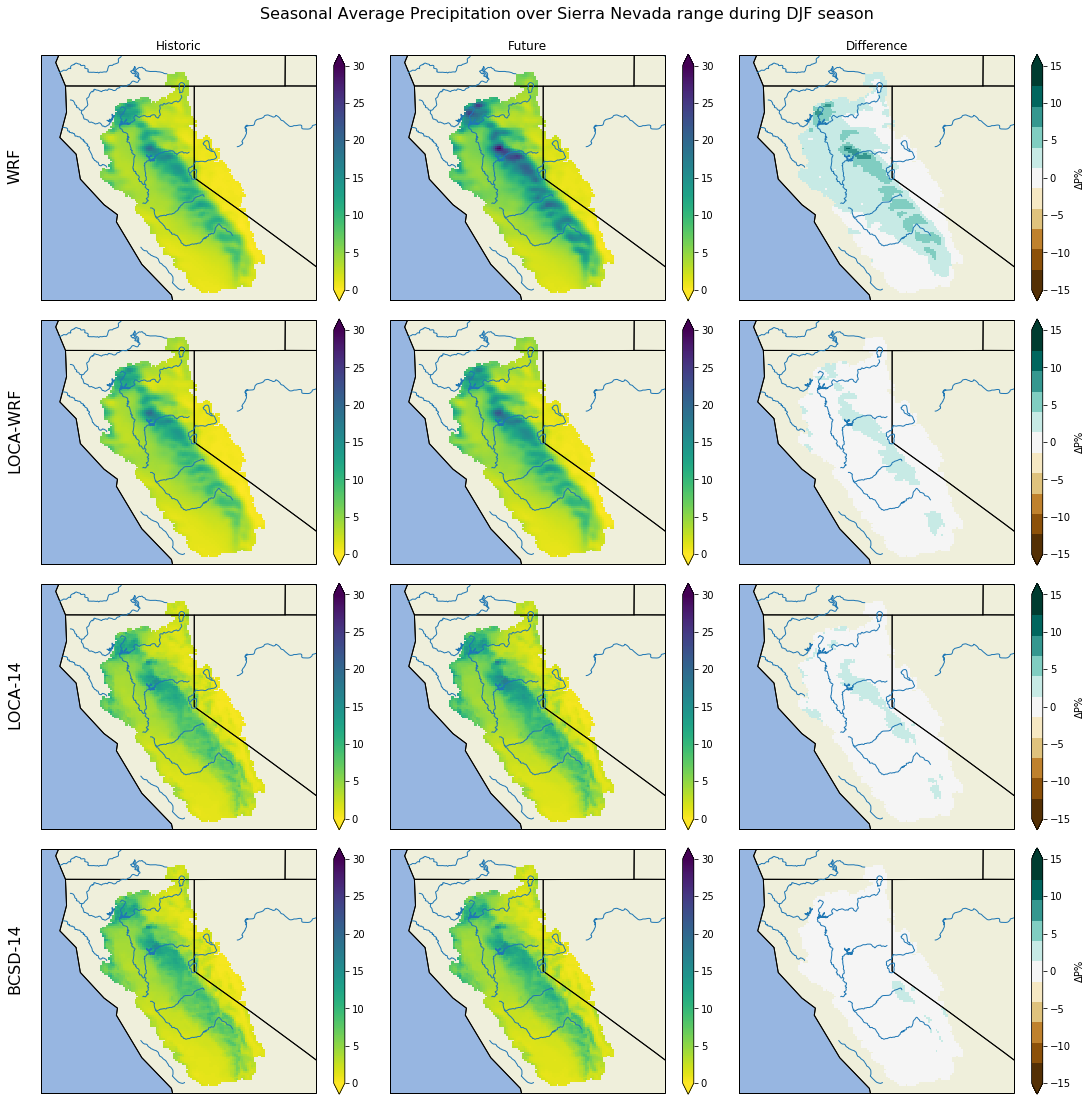

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})

season_str = 'DJF'
cbar_label_title = 'ΔP%'
cbar_color = 'viridis_r'

cbar_range_past = set()
cbar_range_future = set()
cbar_range_diff = set()
def add_to_cbar(ds, var_str ,cbar_set):
    get_df = ds.to_dataframe()
    cbar_set.add(get_df[var_str].min())
    cbar_set.add(get_df[var_str].max())
    
# Historic Mean Temperature, 1991-01-01 to 2000-12-31
past_mean = [
    pr_wrf_1991.sel(season=season_str), 
    pr_loca_wrf_1991.sel(season=season_str),
    pr_loca_14_1991.sel(season=season_str),
    pr_bcsd_L14_1991.sel(season=season_str)
]

# Future Mean Temperature
future_mean = [
    pr_wrf_2091.sel(season=season_str),
    pr_loca_wrf_2091.sel(season=season_str),
    pr_loca_14_2091.sel(season=season_str),
    pr_bcsd_L14_2091.sel(season=season_str)
]

# cbar range calculations
for i in range(len(past_mean)):
    add_to_cbar(past_mean[i], 'pr', cbar_range_past)
    add_to_cbar(future_mean[i], 'pr', cbar_range_future)
    diff_calc = future_mean[i] - past_mean[i]
    add_to_cbar(diff_calc, 'pr', cbar_range_diff)

print(cbar_range_diff)
print(cbar_range_future)
print(cbar_range_past)

clim_future_past = max([setup_clim(cbar_range_future), setup_clim(cbar_range_past)], key=lambda t: abs(t[0]))
print(clim_future_past)

models = ('WRF', 'LOCA-WRF', 'LOCA-14', 'BCSD-14')
for i, model in enumerate(models):
     # Historic mean plot
    past_plot = past_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 0], extend='both', add_labels=False)
    past_plot.set_clim(clim_future_past)
    # Future mean plot
    future_plot = future_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 1], extend='both', add_labels=False)
    future_plot.set_clim(clim_future_past)
    # Difference plot
    diff_plot = future_mean[i] - past_mean[i]
    diff_plot = diff_plot.plot(cmap=plt.get_cmap('BrBG', 11), ax=axes[i, 2], extend='both', cbar_kwargs={'label': cbar_label_title})
    diff_plot.set_clim(setup_clim(cbar_range_diff))
    axes[i, 0].set_ylabel(model)
    axes[i, 1].set_ylabel('')
    axes[i, 2].set_ylabel('')
    if i > 0:
        axes[i, 0].set_title("")
        axes[i, 1].set_title("")
        axes[i, 2].set_title("")
  
axes[0, 0].set_title('Historic')
axes[0, 1].set_title('Future')
axes[0, 2].set_title('Difference')
my_suptitle = fig.suptitle('Seasonal Average Precipitation over Sierra Nevada range during {0} season'.format(season_str), fontsize=16, y=1.02)

counter = 0
for i, ax in enumerate(axes.flat):
    #ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    ax.set_extent([-125, -116, 43, 35])
    #gridlines = ax.gridlines(draw_labels=True)
    if(i == 0 or i % 3 == 0):
        ax.text(-0.07, 0.55, '{0}'.format(models[counter]), va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes, fontsize=16)
        counter = counter + 1
    
    #ax.text(0.5, -0.2, 'longitude', va='bottom', ha='center',
        #rotation='horizontal', rotation_mode='anchor',
        #transform=ax.transAxes)

plt.tight_layout()
fig.savefig('Precipitation during {0} over Sierra Nevada range.png'.format(season_str), dpi=150, bbox_inches="tight")


In [37]:
cbar_range_diff

{-0.8622589,
 -0.6868559,
 -0.49777222,
 -0.47406936,
 0.668818,
 0.7007327,
 0.8592379,
 1.0130401}

In [38]:
cbar_range_future

{0.092250995,
 0.15236987,
 0.23379181,
 0.28275427,
 7.834616,
 7.991107,
 8.223344,
 8.560899}

In [39]:
cbar_range_past

{0.10383333,
 0.111300856,
 0.2601586,
 0.26982746,
 7.576764,
 7.875396,
 8.240399,
 8.31894}

In [42]:
#### not needed code below

#### Configuration for the map

```` python
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
               nrows_ncols=(4, 2),
               axes_pad = 0.5,
                cbar_location="right",
                    cbar_mode="single",

               label_mode='')
cbar_label_title = 'ΔP%'

for i, season in enumerate(('DJF', 'MAM')):
    mean_diff_wrf_1991_2091 = ((pr_wrf_2091.sel(season=season) - pr_wrf_1991.sel(season=season)) / pr_wrf_1991.sel(season=season)) * 100
    mean_diff_loca_wrf_1991_2091 = ((pr_loca_wrf_2091.sel(season=season) - pr_loca_wrf_1991.sel(season=season)) / pr_loca_wrf_1991.sel(season=season)) * 100
    mean_diff_loca_14_1991_2091 = ((pr_loca_14_2091.sel(season=season) - pr_loca_14_1991.sel(season=season)) / pr_loca_14_1991.sel(season=season)) * 100
    mean_diff_bcsd_L14_1991_2091 = ((pr_bcsd_L14_2091.sel(season=season) - pr_bcsd_L14_1991.sel(season=season)) / pr_bcsd_L14_1991.sel(season=season)) * 100
    
    test_plt_month = mean_diff_wrf_1991_2091.plot.pcolormesh(ax=axgr[i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')
    test_plt_month = mean_diff_loca_wrf_1991_2091.plot.pcolormesh(ax=axgr[2+i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')
    test_plt_month = mean_diff_bcsd_L14_1991_2091.plot.pcolormesh(ax=axgr[4+i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')
    test_plt_month = mean_diff_loca_14_1991_2091.plot.pcolormesh(ax=axgr[6+i], add_colorbar=False, x='longitude', y='latitude', cmap='viridis_r')

    
for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.set_xlabel("ayy")
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    
axgr[0].yaxis.set_label_position('left')
axgr[0].yaxis.set_label_text('latitude')

cb = axgr.cbar_axes[0].colorbar(test_plt_month)
cb.set_label_text(cbar_label_title)
````